# A. Problem Statement

An online retail store is trying to understand the various customer purchase patterns for their firm, you are required to give
enough evidence based insights to provide the same.

# B. Project Objective

The objective of this project is to find useful insights about the customer purchasing behaviour by using machine learning
techniuqes to improve customer experiences and improve sales and segmenting the customers based on their purchasing behavior.

# C. Data Description

The Online Retails dataset is a collection of data from an online retail store. It is a transnational dataset which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. It contains information about customers, products, and orders. The dataset can be used to analyze customer behavior, product trends, and other insights. It can also be used to build predictive models to predict customer behavior and product trends.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
retail = pd.read_csv('OnlineRetail.csv', encoding = 'Unicode_escape')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# D. Data Pre-processing Steps and Inspiration

The Pre-processing of the data includes the following steps:
1. Data Cleaning: Removing missing or invalid data points, as well as outliers that may skew the results.
2. Data Preparation: Analysing Customers based on 3 factors- Recency, Frequency and Monetary.

In [3]:
retail.shape

(541909, 8)

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Data Cleansing

In [6]:
#Checkinh Nulls

retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
null = round(100*(retail.isnull().sum())/len(retail), 2)
null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [8]:
retail.dropna(inplace = True)

In [9]:
retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
retail.shape

(406829, 8)

In [11]:
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [12]:
retail.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [13]:
retail['CustomerID'] = retail['CustomerID'].astype(str)

In [14]:
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

### Data Preparation

We are going to analyse the Customers based on 3 factors: 
1. R (Recency): Number of days since last purchase
2. F (Frequency): Number of transacton
3. M (Monetary): Total amount of transaction (revenue contributed)

In [15]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [16]:
retail['Amount'] = retail['Quantity'] * retail['UnitPrice']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [17]:
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m.head()

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
Name: Amount, dtype: float64

In [18]:
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [19]:
rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f.head()

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: InvoiceNo, dtype: int64

In [20]:
rfm_f = rfm_f.reset_index()
rfm_f.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [21]:
rfm_f.columns

Index(['CustomerID', 'InvoiceNo'], dtype='object')

In [22]:
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [23]:
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [24]:
# Merging two dfs

rfm = pd.merge(rfm_m, rfm_f, on = 'CustomerID', how = 'inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [25]:
rfm.shape

(4372, 3)

In [26]:
# RECENCY

retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], format = '%m/%d/%Y %H:%M')

In [27]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [28]:
retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Amount                float64
dtype: object

In [29]:
# Computing the maximum date to know the last transaction date

max_date = retail['InvoiceDate'].max()
max_date

Timestamp('2011-12-09 12:50:00')

In [30]:
# Computing the difference between maximum date and transaction date

retail['Difference'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [31]:
# Computing the last transaction date to calculate the Recency

rfm_p = retail.groupby('CustomerID')['Difference'].min()
rfm_p.head()

CustomerID
12346.0   325 days 02:33:00
12347.0     1 days 20:58:00
12348.0    74 days 23:37:00
12349.0    18 days 02:59:00
12350.0   309 days 20:49:00
Name: Difference, dtype: timedelta64[ns]

In [32]:
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Difference
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [33]:
rfm_p.shape

(4372, 2)

In [34]:
# Extracting number of days only

rfm_p['Difference'] = rfm_p['Difference'].dt.days
rfm_p.head()

,CustomerID,Difference
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [35]:
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [36]:
# Merging the dataframes to get final rfm dataframe

rfm = pd.merge(rfm, rfm_p, on = 'CustomerID', how = 'inner')
rfm.head()

,CustomerID,Amount,Frequency,Difference
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [37]:
rfm.shape

(4372, 4)

In [38]:
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [39]:
rfm.describe()

,Amount,Frequency,Recency
count,4372.000000,4372.000000,4372.000000
mean,1898.459701,93.053294,91.047118
std,8219.345141,232.471608,100.765435
min,-4287.630000,1.000000,0.000000
25%,293.362500,17.000000,16.000000
50%,648.075000,42.000000,49.000000
75%,1611.725000,102.000000,142.000000
max,279489.020000,7983.000000,373.000000


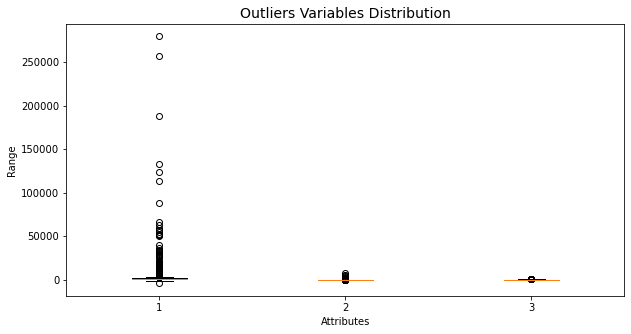

In [40]:
# Outlier analysis of Amount, Frequnecy and Recency

attributes = ['Amount', 'Frequency', 'Recency']

plt.figure(figsize = (10, 5))
plt.boxplot(rfm[attributes])
plt.title("Outliers Variables Distribution", fontsize = 14)
plt.xlabel("Attributes")
plt.ylabel("Range")
plt.show()

In [41]:
Q1 = rfm.Amount.quantile(0.25)
Q3 = rfm.Amount.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5 * IQR) & (rfm.Amount <= Q3 + 1.5 * IQR)]

Q1 = rfm.Recency.quantile(0.25)
Q3 = rfm.Recency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5 * IQR) & (rfm.Recency <= Q3 + 1.5 * IQR)]

Q1 = rfm.Frequency.quantile(0.25)
Q3 = rfm.Frequency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5 * IQR) & (rfm.Frequency <= Q3 + 1.5 * IQR)]

In [42]:
rfm.shape

(3629, 4)

In [43]:
rfm.describe()

,Amount,Frequency,Recency
count,3629.000000,3629.000000,3629.000000
mean,787.019433,47.736567,97.162855
std,745.191104,42.505471,96.901974
min,-1592.490000,1.000000,0.000000
25%,257.230000,15.000000,21.000000
50%,530.150000,33.000000,58.000000
75%,1065.350000,69.000000,156.000000
max,3563.850000,181.000000,362.000000


In [44]:
# Rescaling the Attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled

array([[-1.05627655, -1.07616428,  2.35153665],
       [ 1.35583983, -0.39380514, -0.23906682],
       [ 1.30257099,  0.59443913, -0.81705007],
       ...,
       [-0.94780621, -0.95851616,  0.85497289],
       [-0.81925771, -0.8173384 , -0.93058249],
       [ 1.40957842,  0.52385025, -0.56934296]])

In [45]:
rfm_df = pd.DataFrame(rfm_df_scaled)
rfm_df.columns = ['Amount', 'Frequency', 'Recency']
rfm_df.head()

,Amount,Frequency,Recency
0,-1.056277,-1.076164,2.351537
1,1.355840,-0.393805,-0.239067
2,1.302571,0.594439,-0.817050
3,-0.607471,-0.723220,2.186399
4,1.017853,1.112091,-0.641591


# E. Choosing the Algorithm for the Project

The algorithm that should be used for this project depends on the type of data we are working with and the type of problem we are trying to solve. For example, if we are working with customer reviews, we can use a supervised learning algorithm such as Logistic Regression or Support Vector Machines. If we are working with machine learning, we can use an unsupervised learning algorithm such as K-Means Clustering or Hierarchical Clustering. Ultimately, the best algorithm.

# F. Motivation and Reasons For Choosing the Algorithm

We will choose K-means clustering algorithm. It is one of the simplest and popular unsupervised machine learning algorithm.

The motivation for choosing a machine learning algorithm for online retail analysis is to gain insights into customer behaviour and preferences. By using machine learning algorithms, retailers can better understand customer buying patterns, identify trends, and make more informed decisions about product offerings and pricing and also can be used to optimize marketing campaigns and improve customer segmentation.

In [46]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(rfm_df)

KMeans(n_clusters=4)

In [47]:
kmeans.labels_

array([2, 0, 0, ..., 2, 3, 0])

### Finding the optimal number of Clusters

Elbow curve to get the right number of clusters

A fundamental steps for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be
clusterd. The Elbow method is one of the most popular methods to determine this optimal value of K

In [48]:
wcss = []
range_n_cluster = [2, 3, 4, 5, 6, 7, 8]
for n in range_n_cluster:
    kmeans = KMeans(n_clusters = n)
    kmeans.fit(rfm_df)
    wcss.append(kmeans.inertia_)
    
wcss

[6112.921835859568,
 3708.1179803497225,
 2922.9555586352594,
 2486.0756843732484,
 2186.061882742723,
 1940.2168668644333,
 1760.627418466545]

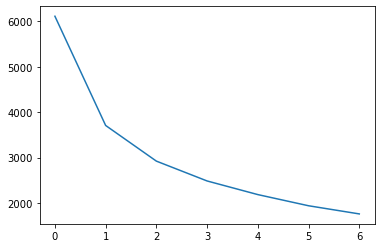

In [49]:
plt.plot(wcss);

In [50]:
# Final model with K

kmeans = KMeans(n_clusters = 3)
kmeans.fit(rfm_df)

KMeans(n_clusters=3)

In [51]:
kmeans.labels_

array([1, 2, 0, ..., 1, 2, 0])

In [52]:
rfm_df

,Amount,Frequency,Recency
0,-1.056277,-1.076164,2.351537
1,1.355840,-0.393805,-0.239067
2,1.302571,0.594439,-0.817050
3,-0.607471,-0.723220,2.186399
4,1.017853,1.112091,-0.641591
...,...,...,...
3624,-0.822881,-0.911457,-0.249388
3625,-0.813889,-0.887927,1.856122
3626,-0.947806,-0.958516,0.854973
3627,-0.819258,-0.817338,-0.930582


In [53]:
rfm

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
5,12352.0,1545.41,95,35
...,...,...,...,...
4366,18278.0,173.90,9,73
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7


In [54]:
# Assining the labels

rfm['ClusterID'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,ClusterID
0,12346.0,0.00,2,325,1
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1
5,12352.0,1545.41,95,35,0


<AxesSubplot:xlabel='ClusterID', ylabel='Amount'>

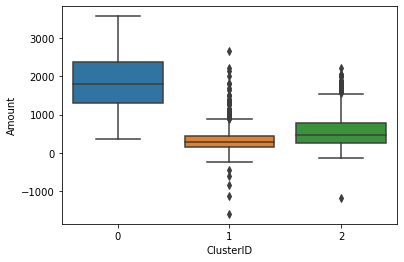

In [55]:
# Boxplot to visualize ClusterID vs Frequency

sns.boxplot(x = 'ClusterID', y = 'Amount', data = rfm)

<AxesSubplot:xlabel='ClusterID', ylabel='Frequency'>

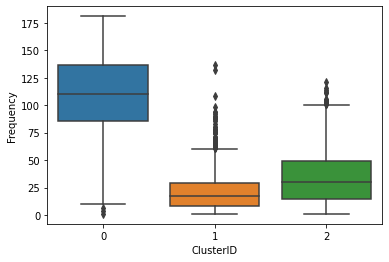

In [56]:
sns.boxplot(x = 'ClusterID', y = 'Frequency', data = rfm)

<AxesSubplot:xlabel='ClusterID', ylabel='Recency'>

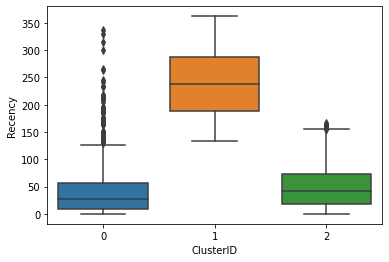

In [57]:
sns.boxplot(x = 'ClusterID', y = 'Recency', data = rfm)

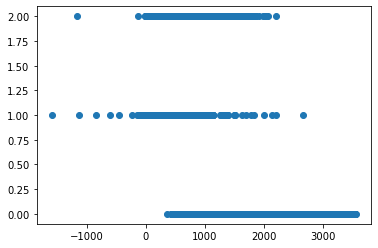

In [58]:
plt.scatter(rfm['Amount'], rfm['ClusterID']);

In [59]:
rfm

,CustomerID,Amount,Frequency,Recency,ClusterID
0,12346.0,0.00,2,325,1
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1
5,12352.0,1545.41,95,35,0
...,...,...,...,...,...
4366,18278.0,173.90,9,73,2
4367,18280.0,180.60,10,277,1
4368,18281.0,80.82,7,180,1
4369,18282.0,176.60,13,7,2


In [60]:
rfm[rfm['ClusterID'] == 2]

,CustomerID,Amount,Frequency,Recency,ClusterID
2,12348.0,1.797240e+03,31,74,2
11,12358.0,1.168060e+03,19,1,2
16,12363.0,5.520000e+02,23,109,2
19,12367.0,1.689000e+02,11,3,2
22,12372.0,1.298040e+03,52,71,2
...,...,...,...,...,...
4363,18274.0,1.776357e-15,22,17,2
4364,18276.0,3.233600e+02,16,20,2
4365,18277.0,9.763000e+01,9,57,2
4366,18278.0,1.739000e+02,9,73,2


# G. Assumptions

1. The data used for the analysis is accurate and up-to-date.
2. The data is representative of the population of online retail customers.
3. The data is properly labeled and organized.
4. The machine learning algorithms used are appropriate for the task.
5. The features used in the analysis are relevant and meaningful.
6. The model is able to generalize to unseen data.
7. The model is able to accurately predict customer behavior.

# H. Model Evaluation and Techniques

Machine learning models can be used to analyze online retail data in order to gain insights into customer behavior and preferences. The most common techniques used for this purpose include supervised learning, unsupervised learning, and reinforcement learning.

# I. Inference from tha same

K-Means Clustering with 3 Cluster Ids

1. Customers with Cluster Id 2 are the customers with high amount of transactions as compared to other customers.
2. Customers with Cluster Id 2 are frequent buyers.
3. Customers with Cluster Id 0 are not recent buyers and hence least of importance from business point of view.

# J. Future Possibilities of the Project

The future possibilities of this project are endless. With the use of machine learning, the project can be used to analyze customer behavior and preferences, predict customer buying patterns, and recommend products to customers based on their past purchases. Additionally, machine learning can be used to identify trends in customer buying patterns and suggest new products or services that may be of interest to customers. Finally, machine learning can be used to optimize pricing and promotions to maximize customer satisfaction and profitability.